In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import torch
from appell_polynomials_3D import appell_polynomials_recursive_3d, Appell_Type, Appell_polynomial_weights, appell_moments_3d_predef

In [9]:
# Parameters
MAX_RANK = 6
SPHERE_RADIUS = 20
APPELL_TYPE = Appell_Type.U
APPELL_S = 1
APPELL_WEIGHT = Appell_polynomial_weights.WEIGHTED_5
SRZ = SPHERE_RADIUS * 2 + 1
# Setting
assert torch.cuda.is_available()
device = torch.device('cuda')

In [10]:
def get_sphere_mask(radius):
    srz = radius * 2 + 1
    assert srz % 2 == 1, "Dimension has to be odd"
    middle = int((srz - 1) / 2)
    xs, ys, zs = np.meshgrid(np.arange(srz), np.arange(srz), np.arange(srz))
    xs = (xs - middle) ** 2
    ys = (ys - middle) ** 2
    zs = (zs - middle) ** 2
    dist = xs + ys + zs
    return dist <= (radius**2)


{(0, 20, 20): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc7665a35e0>,
 (1, 14, 19): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc7665a3760>,
 (1, 14, 21): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc7665a3b50>,
 (1, 15, 17): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc7665a3f40>,
 (1, 15, 23): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc75e0d8370>,
 (1, 16, 16): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc75e0d8760>,
 (1, 16, 24): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc75e0d8b50>,
 (1, 17, 15): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc75e0d8f40>,
 (1, 17, 25): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc75e0d9330>,
 (1, 18, 15): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc75e0d9720>,
 (1, 18, 25): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc75e0d9b10>,
 (1, 19, 14): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fc75e0d9f00>,
 (1, 19, 26): <mpl_toolkits.mplot3d.art3d.Poly3DColl

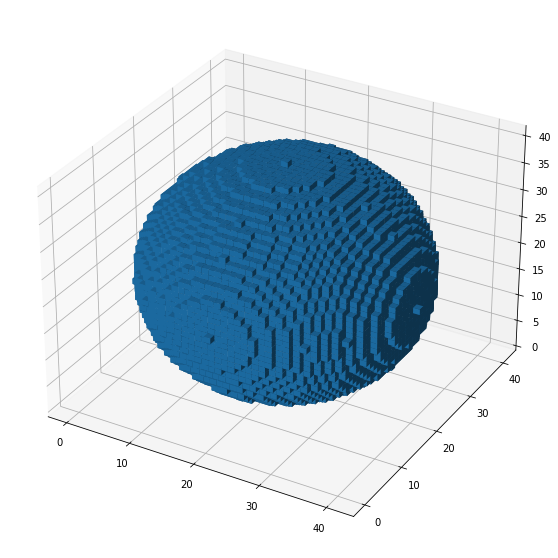

In [5]:
ax = plt.figure(figsize=(20,10)).add_subplot(projection='3d')
ax.voxels(get_sphere_mask(20))


In [25]:
numpy_worm = io.imread("/home/karellat/PycharmProjects/nuclei/data/c_elegans_nuclei/train/images/C18G1_2L1_1.tif")
numpy_masks = io.imread("/home/karellat/PycharmProjects/nuclei/data/c_elegans_nuclei/train/masks/C18G1_2L1_1.tif")
# TODO: Fix worm size
numpy_worm = numpy_worm[:, :, :1241]
assert numpy_worm.dtype == np.uint8
numpy_worm = numpy_worm / 255.0

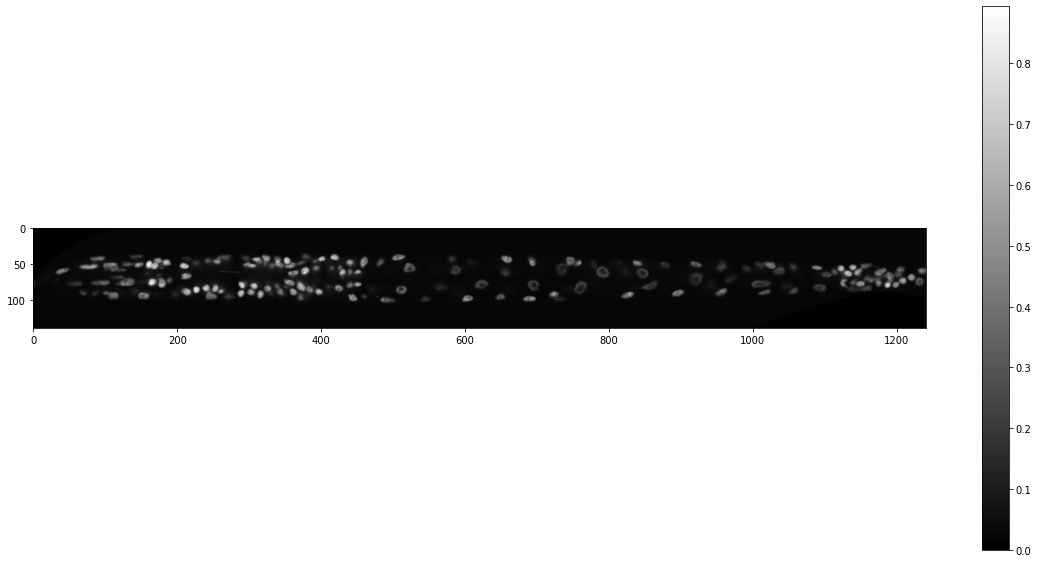

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.imshow(numpy_worm[70, :, :], cmap='gray')
plt.colorbar()

In [36]:
from scipy import io
import numpy as np
from glob import glob
from
import torch
invariants = torch.zeros([10, 77])

for idx, f in enumerate(glob('classes/*.mat')):
    invariants[idx] = torch.from_numpy(io.loadmat(f)['invariants'])

testing_set = invariants[:3].clone()
invariants = invariants[5:]

In [37]:
distance = torch.cdist(testing_set, invariants)
min_distance, argmin_distance = torch.min(distance, dim=-1)

In [39]:
argmin_distance

tensor([4, 4, 3])

In [1]:
import torch

distances = torch.load('result/GH_20/result_GH_20_distance.pt', map_location=torch.device('cpu'))
indexes = torch.load('result/GH_20/result_GH_20_argmin.pt', map_location=torch.device('cpu'))
print(torch.min(distances[20:-20, 20:-20, 20:-20]))
from scipy.io import savemat
savemat('result/GH_20/results.mat', dict(minimal_distances=distances.numpy(),
                                   argmin_distances=indexes.numpy()))

tensor(-2., dtype=torch.float64)


In [7]:
distances[20:-20, 20:-20, 20:-20]


tensor([[[-2.0000, -2.0000, -2.0000,  ..., -2.0000, -2.0000, -2.0000],
         [-2.0000, -2.0000, -2.0000,  ..., -2.0000, -2.0000, -2.0000],
         [-2.0000, -2.0000, -2.0000,  ..., -2.0000, -2.0000, -2.0000],
         ...,
         [ 1.6053,  1.6076,  1.6087,  ..., -2.0000, -2.0000, -2.0000],
         [ 1.6052,  1.6075,  1.6086,  ..., -2.0000, -2.0000, -2.0000],
         [ 1.6052,  1.6074,  1.6085,  ..., -2.0000, -2.0000, -2.0000]],

        [[-2.0000, -2.0000, -2.0000,  ..., -2.0000, -2.0000, -2.0000],
         [-2.0000, -2.0000, -2.0000,  ..., -2.0000, -2.0000, -2.0000],
         [-2.0000, -2.0000, -2.0000,  ..., -2.0000, -2.0000, -2.0000],
         ...,
         [ 1.6051,  1.6076,  1.6088,  ..., -2.0000, -2.0000, -2.0000],
         [ 1.6050,  1.6075,  1.6087,  ..., -2.0000, -2.0000, -2.0000],
         [ 1.6049,  1.6074,  1.6086,  ..., -2.0000, -2.0000, -2.0000]],

        [[-2.0000, -2.0000, -2.0000,  ..., -2.0000, -2.0000, -2.0000],
         [-2.0000, -2.0000, -2.0000,  ..., -2

In [23]:
numpy_masks = io.imread("/home/karellat/PycharmProjects/nuclei/data/c_elegans_nuclei/train/masks/C18G1_2L1_1.tif")

In [20]:
volumes = np.zeros_like(np.unique(numpy_masks)[1:])
d = np.zeros_like(volumes)
for idx, mask_idx in enumerate(np.unique(numpy_masks)[1:]):
    volumes[idx] = np.sum(numpy_masks == mask_idx)
    d[idx] = 2 * np.sqrt(volumes[idx] / np.pi)
    print(f'{mask_idx}: {d[idx]}')

1: 17
2: 29
3: 31
4: 31
5: 31
6: 32
7: 32
8: 31
9: 30
10: 31
11: 23
12: 30
13: 31
14: 20
15: 31
16: 29
17: 33
18: 33
19: 31
20: 30
21: 36
22: 33
23: 30
24: 29
25: 29
26: 33
27: 32
28: 36
29: 33
30: 28
31: 35
32: 31
33: 17
34: 31
35: 34
36: 37
37: 38
38: 34
39: 33
40: 33
41: 34
42: 30
43: 32
44: 33
45: 33
46: 32
47: 32
48: 30
49: 34
50: 33
51: 32
52: 33
53: 32
54: 29
55: 33
56: 34
57: 31
58: 34
59: 33
60: 32
61: 32
62: 31
63: 24
64: 32
65: 34
66: 29
67: 32
68: 35
69: 32
70: 33
71: 32
72: 29
73: 31
74: 32
75: 34
76: 34
77: 30
78: 33
79: 35
80: 36
81: 35
82: 38
83: 33
84: 33
85: 32
86: 32
87: 35
88: 34
89: 30
90: 32
91: 32
92: 31
93: 32
94: 21
95: 33
96: 32
97: 31
98: 34
99: 32
100: 34
101: 31
102: 34
103: 32
104: 35
105: 33
106: 37
107: 21
108: 30
109: 32
110: 26
111: 33
112: 32
113: 34
114: 33
115: 31
116: 35
117: 32
118: 32
119: 33
120: 35
121: 30
122: 32
123: 32
124: 36
125: 31
126: 31
127: 34
128: 32
129: 31
130: 29
131: 35
132: 31
133: 31
134: 32
135: 32
136: 31
137: 24
138: 37
139:

(array([  3.,   2.,   4.,   9.,   4.,  23.,  71., 153., 133.,  65.,  39.,
         16.,   6.,   5.,   3.,   4.,   3.,   7.,   1.,   4.]),
 array([16. , 18.2, 20.4, 22.6, 24.8, 27. , 29.2, 31.4, 33.6, 35.8, 38. ,
        40.2, 42.4, 44.6, 46.8, 49. , 51.2, 53.4, 55.6, 57.8, 60. ]),
 <BarContainer object of 20 artists>)

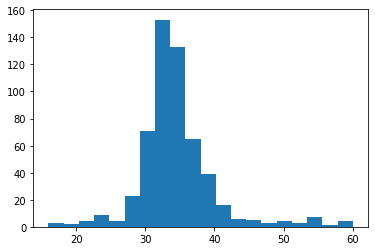

In [22]:
plt.hist(d, bins=20)

In [38]:
from tqdm.notebook import tqdm
mask_indicies = np.unique(numpy_masks)[1:]
coord = np.zeros((mask_indicies.shape[0], 3), dtype=np.int32)
mask_name = np.zeros((mask_indicies.shape[0], 3))
with tqdm(total=len(mask_indicies)) as pbar:
    for idx, mask_idx in enumerate(mask_indicies):
        mask = numpy_masks == mask_idx
        x, y, z = np.where(mask)
        cx = np.mean(x).astype(int)
        cy = np.mean(y).astype(int)
        cz = np.mean(z).astype(int)
        mask_name[idx] = mask_idx
        coord[idx, 0] = cx
        coord[idx, 1] = cy
        coord[idx, 2] = cz
        pbar.update(1)


  0%|          | 0/555 [00:00<?, ?it/s]

In [43]:
from scipy.io import savemat
savemat(f'masks.mat', dict(mask_idx=mask_name, mask_coord=coord))

In [42]:
np.max(coord, axis=0)

array([  97,  100, 1240], dtype=int32)

In [132]:
from matlab_bridge import matlab_readinv3dst
import numpy as np
moments2invariants = matlab_readinv3dst('matlab/ccmf6indep.txt')
matlab_indicies = moments2invariants['ind'][0][0:-1]
matlab_coef = moments2invariants['coef'][0][0:-1]
python_indicies = []
python_coef = []
for idx, (ind, coef) in enumerate(zip(matlab_indicies, matlab_coef)):
    ind = np.array(ind)
    if  np.array(coef).ndim == 0:
        coef = np.array([[coef]], dtype=np.float64)
    else:
        coef = np.array(coef, dtype=np.float64)
    num_product = int(ind.shape[1]/3)
    num_sum = ind.shape[0]
    products = np.zeros((num_product, num_sum,3), dtype=np.int64)
    for i in range(0, num_product):
       products[i, :, :] = ind[:,i*3:i*3+3]
    #print(idx, ind.shape, coef.shape, "-", products.shape)
    #print(products)
    python_indicies.append(products)
    python_coef.append(coef)
    assert coef.shape[1] == ind.shape[0]
    assert ind.shape[1] % 3 == 0

# Reindexing moments
for ind in python_indicies:
    ind[:, :, 2] = ind[:, :, 1] + ind[:, :, 2]
    ind[:, :, 1] = np.floor(ind[:, :, 1]/2).astype(int)



In [85]:
python_indicies[0].dtype

dtype('int64')

In [86]:
python_coef[0].dty

dtype('float64')

In [121]:
len(python_coef


[array([[1.]]),
 array([[ 0.4472136 , -0.89442719,  0.89442719]]),
 array([[-0.23904572,  0.71713717, -0.87831007, -0.87831007,  1.43427433]]),
 array([[-0.37796447,  0.75592895, -0.75592895,  0.75592895]]),
 array([[-0.57735027,  1.15470054]]),
 array([[ 0.08518354, -0.34073417,  0.4472136 , -0.23328474,  0.32991444,
         -0.23328474,  0.85183542, -0.63887656, -0.9035079 ,  0.8247861 ,
          0.32991444, -0.9035079 ,  0.42591771,  0.8247861 , -0.21295885,
         -1.06479427,  0.53239714]]),
 array([[ 0.05216405, -0.10432811, -0.04761905,  0.26082027, -0.33671751,
          0.26937401, -0.55328334,  0.52164053, -0.12777531,  0.36203005,
         -0.34992711, -0.34992711,  0.42591771,  0.15058465,  0.15058465,
         -0.31943828,  0.05216405, -0.10432811, -0.04761905,  0.26937401,
          0.26082027, -0.55328334, -0.33671751,  0.52164053]]),
 array([[ 0.23904572, -0.43643578,  0.3086067 , -0.19518001,  0.53452248,
         -0.69006556,  0.15936381, -0.23904572,  0.39840954,

In [142]:
np.savez_compressed('complex_moments2invariants/complex_moments2invariants_coef.npz', *python_coef)

In [124]:
np.savez_compressed('complex_moments2invariants/complex_moments2invariants_ind.npz', ind=python_indicies)


/home/karellat/.conda/envs/nuclei/lib/python3.10/site-packages/numpy/lib/npyio.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


ValueError: could not broadcast input array from shape (3,) into shape (1,)

In [103]:
np.load('torch_invariants3Dinv10/moments2invariants.npz', allow_pickle=True)['coef'].dtype

dtype('O')

In [96]:
np.load('torch_invariants3Dinv10/moments2invariants.npz', allow_pickle=True)['ind'][0].dtype


dtype('O')

In [141]:
python_coef[0].dtype


dtype('float64')

In [146]:
from matlab_bridge import matlab_readinv3dst
import numpy as np

moments2invariants = matlab_readinv3dst('matlab/ccmf6indep.txt')
np.savez_compressed("matlab_complex_moments2invariants.npz",
                    coef=moments2invariants['coef'],
                    ind=moments2invariants['ind'])

In [117]:
len(python_indicies)

77

In [123]:
python_coef

[array([[1.]]),
 array([[ 0.4472136 , -0.89442719,  0.89442719]]),
 array([[-0.23904572,  0.71713717, -0.87831007, -0.87831007,  1.43427433]]),
 array([[-0.37796447,  0.75592895, -0.75592895,  0.75592895]]),
 array([[-0.57735027,  1.15470054]]),
 array([[ 0.08518354, -0.34073417,  0.4472136 , -0.23328474,  0.32991444,
         -0.23328474,  0.85183542, -0.63887656, -0.9035079 ,  0.8247861 ,
          0.32991444, -0.9035079 ,  0.42591771,  0.8247861 , -0.21295885,
         -1.06479427,  0.53239714]]),
 array([[ 0.05216405, -0.10432811, -0.04761905,  0.26082027, -0.33671751,
          0.26937401, -0.55328334,  0.52164053, -0.12777531,  0.36203005,
         -0.34992711, -0.34992711,  0.42591771,  0.15058465,  0.15058465,
         -0.31943828,  0.05216405, -0.10432811, -0.04761905,  0.26937401,
          0.26082027, -0.55328334, -0.33671751,  0.52164053]]),
 array([[ 0.23904572, -0.43643578,  0.3086067 , -0.19518001,  0.53452248,
         -0.69006556,  0.15936381, -0.23904572,  0.39840954,

In [131]:
np.save('complex_moments2invariants/complex_moments2invariants_coef.npz', python_coef, allow_pickle=True)

ValueError: could not broadcast input array from shape (3,) into shape (1,)

In [126]:
for i in python_indicies:
    print(i.shape)

(1, 1, 3)
(2, 3, 3)
(3, 5, 3)
(2, 4, 3)
(2, 2, 3)
(4, 17, 3)
(4, 24, 3)
(4, 18, 3)
(4, 10, 3)
(3, 15, 3)
(3, 15, 3)
(3, 6, 3)
(4, 33, 3)
(1, 1, 3)
(2, 5, 3)
(2, 3, 3)
(3, 21, 3)
(3, 15, 3)
(3, 5, 3)
(3, 13, 3)
(4, 31, 3)
(3, 21, 3)
(3, 25, 3)
(3, 11, 3)
(4, 25, 3)
(4, 26, 3)
(4, 30, 3)
(4, 14, 3)
(2, 6, 3)
(2, 4, 3)
(2, 2, 3)
(4, 17, 3)
(4, 24, 3)
(4, 18, 3)
(4, 10, 3)
(3, 26, 3)
(3, 15, 3)
(3, 15, 3)
(3, 6, 3)
(4, 18, 3)
(4, 18, 3)
(4, 8, 3)
(3, 26, 3)
(3, 15, 3)
(3, 15, 3)
(3, 6, 3)
(3, 27, 3)
(3, 24, 3)
(3, 21, 3)
(1, 1, 3)
(2, 7, 3)
(2, 5, 3)
(2, 3, 3)
(3, 31, 3)
(3, 21, 3)
(3, 15, 3)
(3, 5, 3)
(3, 13, 3)
(3, 25, 3)
(4, 31, 3)
(3, 31, 3)
(3, 21, 3)
(3, 25, 3)
(3, 11, 3)
(4, 25, 3)
(4, 26, 3)
(4, 30, 3)
(4, 14, 3)
(3, 21, 3)
(3, 25, 3)
(3, 11, 3)
(3, 15, 3)
(4, 25, 3)
(4, 29, 3)
(4, 26, 3)
(4, 30, 3)
(4, 14, 3)


In [127]:
for i in python_coef:
    print(i.shape)

(1, 1)
(1, 3)
(1, 5)
(1, 4)
(1, 2)
(1, 17)
(1, 24)
(1, 18)
(1, 10)
(1, 15)
(1, 15)
(1, 6)
(1, 33)
(1, 1)
(1, 5)
(1, 3)
(1, 21)
(1, 15)
(1, 5)
(1, 13)
(1, 31)
(1, 21)
(1, 25)
(1, 11)
(1, 25)
(1, 26)
(1, 30)
(1, 14)
(1, 6)
(1, 4)
(1, 2)
(1, 17)
(1, 24)
(1, 18)
(1, 10)
(1, 26)
(1, 15)
(1, 15)
(1, 6)
(1, 18)
(1, 18)
(1, 8)
(1, 26)
(1, 15)
(1, 15)
(1, 6)
(1, 27)
(1, 24)
(1, 21)
(1, 1)
(1, 7)
(1, 5)
(1, 3)
(1, 31)
(1, 21)
(1, 15)
(1, 5)
(1, 13)
(1, 25)
(1, 31)
(1, 31)
(1, 21)
(1, 25)
(1, 11)
(1, 25)
(1, 26)
(1, 30)
(1, 14)
(1, 21)
(1, 25)
(1, 11)
(1, 15)
(1, 25)
(1, 29)
(1, 26)
(1, 30)
(1, 14)
